# here will be a mega pretty file explaining everything Quick start

In [24]:
import pandas as pd


import propythia

1.Getting sequences

In [12]:
from propythia.sequence import ReadSequence

It is possible to create sequence object using uniprotID or the sequence itself. 
Check protein will warn you if some sequence contain invalid characters. If the protein is not valid, it returns an error message. It is not possible to get sequence objects with invalid proteins. 

In [7]:
sequence=ReadSequence() #create the object to read sequence    

print('read sequence from uniprot id')
ps=sequence.get_protein_sequence_from_id('P48039') #from uniprot id
print(ps)

print('read sequence from sequence')
ps_string=sequence.read_protein_sequence("MQGNGSALPNASQPVLRGDGARPSWLASALACVLIFTIVVDILGNLLVILSVYRNKKLRN")#from string


print('check protein')
protein_inv="ADGCGVGEGTGQGPMCNCMCMKWVYADEDAADLESDSFADEDASLESDSFPWSNQRVFCSFADEDASX" #invalid aminoacid with an X
sequence.checkprotein(protein_inv)
protein='MQGNGSALPNASQPVLRGDGARPSWLASALACVLIFTIVVDILGNL'
sequence.checkprotein(protein)



read sequence from uniprot id
MQGNGSALPNASQPVLRGDGARPSWLASALACVLIFTIVVDILGNLLVILSVYRNKKLRNAGNIFVVSLAVADLVVAIYPYPLVLMSIFNNGWNLGYLHCQVSGFLMGLSVIGSIFNITGIAINRYCYICHSLKYDKLYSSKNSLCYVLLIWLLTLAAVLPNLRAGTLQYDPRIYSCTFAQSVSSAYTIAVVVFHFLVPMIIVIFCYLRIWILVLQVRQRVKPDRKPKLKPQDFRNFVTMFVVFVLFAICWAPLNFIGLAVASDPASMVPRIPEWLFVASYYMAYFNSCLNAIIYGLLNQNFRKEYRRIIVSLCTARVFFVDSSNDVADRVKWKPSPLMTNNNVVKVDSV
read sequence from sequence
check protein
Error......
Please input a correct protein.
sequence valid


In [10]:
print('obtain sequences with equal size')
list_reverse_n=(sequence.get_sized_seq(['AAAANNDAKMAPSSAA', 'AAAANNDAKMAPSSAAAAAAAAAAAAA', 'AAAAKMAAA', 'AAAANNDAKMAPSSAAAAAAAAAAAAAAAAANNDAKMAPSSAAAAAAAAAAAAA', 'Z'], 10, 0))
print(list_reverse_n)
list_in_c=sequence.get_sized_seq(['AAAANNDAKMAPSSAA', 'AAAANNDAKMAPSSAAAAAAAAAAAAA', 'AAAAKMAAA'], 0, 10)
print(list_in_c)
print((sequence.get_sized_seq('AAVFNDRAT', 5, 5, 2)))

obtain sequences with equal size
['AAAANNDAKM', 'AAAANNDAKM', 'AAAAKMAAAZ', 'AAAANNDAKM', 'ZZZZZZZZZZ']
['DAKMAPSSAA', 'AAAAAAAAAA', 'ZAAAAKMAAA']
['AZZZZZZZZA', 'AZZZZZZZZA', 'VZZZZZZZZV', 'FZZZZZZZZF', 'NZZZZZZZZN', 'DZZZZZZZZD', 'RZZZZZZZZR', 'AZZZZZZZZA', 'TZZZZZZZZT']


In [11]:
print('Generating subsequences')
protein="ADGCGVGEGTGQGPMCNCMCMKWVYADEDAADLESDSFADEDASLESDSFPWSNQRVFCSFADEDAS"

list_subseq,indices=sequence.get_sub_seq_sliding_window (protein, window_size=20, gap=10, index=True)
print(list_subseq,indices)
subseq_to_aa=sequence.get_sub_seq_to_aa(protein, ToAA='S', window=5)
print(subseq_to_aa)
subseq_split=sequence.get_sub_seq_split(protein, number_of_subseq=5)
print(subseq_split)
subseq_terminals=sequence.get_sub_seq_terminals(protein, N_terminal=5, C_terminal=5, rest=True)
print(subseq_terminals)

Generating subsequences
['ADGCGVGEGTGQGPMCNCMC', 'GQGPMCNCMCMKWVYADEDA', 'MKWVYADEDAADLESDSFAD', 'ADLESDSFADEDASLESDSF', 'EDASLESDSFPWSNQRVFCS'] [(0, 20), (10, 30), (20, 40), (30, 50), (40, 60)]
['AADLESDSFAD', 'DLESDSFADED', 'ADEDASLESDS', 'DASLESDSFPW', 'SLESDSFPWSN', 'DSFPWSNQRVF', 'QRVFCSFADED']
['ADGCGVGEGTGQG', 'PMCNCMCMKWVYA', 'DEDAADLESDSFAD', 'EDASLESDSFPWS', 'NQRVFCSFADEDAS']
['ADGCG', 'DEDAS', 'VGEGTGQGPMCNCMCMKWVYADEDAADLESDSFADEDASLESDSFPWSNQRVFCSFA']


2. Get features from sequence

In [15]:
from propythia.descriptors import Descriptor

In [23]:
ps=sequence.get_protein_sequence_from_id('P48039') #sequence object from uniprot id
protein = Descriptor(ps) # creating object to calculate descriptors

test1=protein.get_all() #all except tripeptide and binaries representations
test1_2=protein.adaptable([3,8,20]) # lenght, molecular weight and aminoacid composition


# print(test1)
print('len of all descriptors exclude tripeptide and binaries', len(test1))
print('dictionary of features', test1_2)
print('len of descriptors 3,8 and 20:', len(test1_2))

len of all descriptors exclude tripeptide and binaries 2097
{'lenght': 350.0, 'MW_modlamp': 39373.43, 'A': 7.714, 'R': 5.143, 'N': 6.571, 'D': 3.429, 'C': 2.857, 'E': 0.571, 'Q': 2.571, 'G': 4.286, 'H': 0.857, 'I': 8.0, 'L': 12.286, 'K': 3.714, 'M': 2.286, 'F': 5.714, 'P': 4.857, 'S': 7.714, 'T': 2.571, 'W': 2.0, 'Y': 5.143, 'V': 11.714}
len of descriptors 3,8 and 20: 22


3. Simple preprocess of dataset

In [30]:
from propythia.preprocess import Preprocess

In [33]:
dataset = pd.read_csv(r'../tests/datasets/dataset_test.csv', delimiter=',', encoding='latin-1')
# separate labels
labels = dataset['labels']
dataset = dataset.loc[:, dataset.columns != 'labels']


# Create Preprocess object
prepro = Preprocess()

#check if there are NaN
prepro.missing_data(dataset)

dataset_zero, colum_Zero = prepro.remove_columns_all_zeros(dataset, True)  # remove zero columns

dataset_without_duplicate, column_duplicated = prepro.remove_duplicate_columns(dataset_zero, True)  # remove duplicated columns

dataset_clean, column_not_variable = prepro.remove_low_variance(dataset_without_duplicate, standard=True, columns_names=True) # remove zero variance columns

print('original dataset shape:', dataset.shape)
print('dataset with zero columns removed shape:', dataset_zero.shape)
print('dataset with removed duplicated columns:', dataset_without_duplicate.shape)
print('dataset with low variance columns removed:', dataset_clean.shape)

0 nans
original dataset shape: (222, 1582)
dataset with zero columns removed shape: (222, 1559)
dataset with removed duplicated columns: (222, 1449)
dataset with low variance columns removed: (222, 1449)


In [34]:
dataset_clean, columns_deleted = prepro.preprocess(dataset, columns_names=True, threshold=0, standard=True)

print('original dataset shape:', dataset.shape)
print('dataset clean:',dataset_clean.shape)

original dataset shape: (222, 1582)
dataset clean: (222, 1449)


4. Feature Selection

from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import f_classif, mutual_info_classif
#from sklearn.feature_selection import f_regression, mutual_info_regression #for regression problems
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from propythia.adjuv_functions.scoring.scores import score_methods

from propythia.feature_selection import FeatureSelection

In [42]:
dataset = pd.read_csv(r'../tests/datasets/dataset1_test_clean.csv', delimiter=',', encoding='latin-1')
x_original=dataset.loc[:, dataset.columns != 'labels']
labels=dataset['labels']


fselect=FeatureSelection(dataset, x_original, labels) #create Feature Selection object

# UNIVARIATE FEATURE SELECTION 

# #KBest com *mutual info classif*
X_fit_univariate_k, X_transf_univariate_k,column_selected_k,scores_k,dataset_features_k = fselect.univariate(score_func=mutual_info_classif, mode='k_best', param=1000)

#Percentile with *f classif*
X_fit_univariate, X_transf_univariate,column_selected,scores,dataset_features = fselect.univariate(score_func=f_classif, mode='percentile', param=0.6)

# Select only the features with p value inferior to 0.015
X_fit_univariate, X_transf_univariate,column_selected,scores,dataset_features = fselect.univariate(score_func=f_classif, mode='fpr', param=0.05)

#shape of transformed dataset
print('shape transformed dataset with univariate feature elimination:',X_transf_univariate_k.shape)
#columns selected by high score
print(fselect.features_scores(x_original,scores_k,column_selected_k, False))



# RECURSIVE FEATURE ELIMINATION

#estimator=SVC kernel=linear with 5 cross validation
X_fit_rfe, X_transf_rfe,column_selected,ranking,dataset_features= fselect.recursive_feature_elimination(cross_validation=True,cv=5)


# SELECT FROM MODEL

# examples of models to be used  
model_lsvc = LinearSVC(C=0.1, penalty="l1", dual=False)
model_lr=LogisticRegression(C=0.1, penalty="l2", dual=False)
model_tree=ExtraTreesClassifier(n_estimators=50)

# model= linearsvs
X_fit_model, X_transf_model,column_selected,feature_importances,feature_importances_DF,dataset_features= \
    fselect.select_from_model_feature_elimination(model=model_lsvc)

print('original shape', dataset.shape)
print('reduce shape', fselect.dataset.shape)
# print('dataset reduced with column names\n', fselect.dataset.head(3))
print('feature importances\n',feature_importances_DF)

shape transformed dataset with univariate feature elimination: (222, 1000)
                             scores
_SolventAccessibilityC1    0.367596
PAAC8                      0.352050
_HydrophobicityD1001       0.343598
_HydrophobicityD1050       0.338372
_PolarityD3025             0.316307
...                             ...
MoranAuto_AvFlexibility23  0.032190
GearyAuto_Mutability19     0.032027
KK                         0.031920
DL                         0.031256
lenght                     0.030996

[1000 rows x 1 columns]
original shape (222, 1449)
reduce shape (222, 6)
feature importances
                          importance
_SolventAccessibilityC1    0.388414
PAAC8                      0.355894
G                          0.001516
_HydrophobicityC1         -0.164371
_HydrophobicityT13        -0.319261


5. Feature Reduction

In [45]:
from propythia.feature_reduction import FeatureReduction

[0.12784946 0.08813338 0.06679714 0.06001914 0.04735697 0.03443097
 0.02976595 0.02774902 0.02577408 0.02166958 0.02041936 0.01910727
 0.01850383 0.01726949 0.0166824  0.01593623 0.0157269  0.01528817
 0.01512777 0.01450949 0.01388174 0.01359966 0.0132965  0.01288661
 0.01246958 0.01216162 0.01177626 0.0115613  0.01117868 0.0108824
 0.01071888 0.01039795 0.01030689 0.01007083 0.00990155 0.00962592
 0.00943698 0.0092656  0.00908577 0.00887952 0.00861827 0.00856009
 0.00838592 0.00816337 0.00810666 0.00795286 0.00785769 0.00773559
 0.00770429 0.00741446]
               PC-1      PC-2      PC-3      PC-4      PC-5      PC-6  \
A          0.025592 -0.070852  0.028939 -0.019511 -0.009445 -0.001894   
AA         0.020702 -0.056263  0.032242 -0.027972 -0.014878  0.000361   
AC         0.003552  0.008101 -0.017802  0.002081 -0.011824 -0.012522   
AD        -0.005259  0.003929 -0.016097 -0.008250 -0.006341 -0.019154   
AE        -0.003042  0.006699 -0.028800 -0.004015  0.012131  0.012287   
...

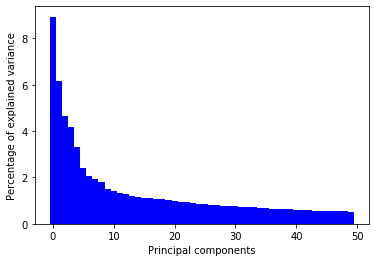

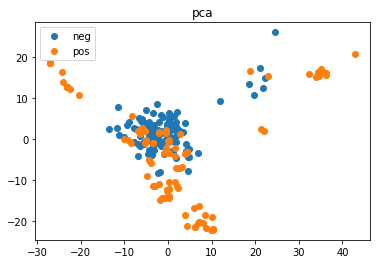

Original shape: (222, 1448)
Reduced shape: (222, 50)
Variance explained by PC: 0.6991098530797429
Number of components 50


In [46]:
# read and define dataset
dataset = pd.read_csv(r'../tests/datasets/dataset1_test_clean.csv', delimiter=',', encoding='latin-1')
labels = dataset['labels']
dataset = dataset.loc[:, dataset.columns != 'labels']


fea_reduced=FeatureReduction() # create Feature Extraction object

# perform pca
pca,x_pca=fea_reduced.pca(dataset, n_components=50)

# check the variance ratio of components
print(fea_reduced.variance_ratio_components(x_pca))

# table with the contribution of each feature to the pca. does not mean that are the most significant (unsupervised learnig) 
print(fea_reduced.contribution_of_features_to_component(dataset, pca, x_pca))

# GRAPHS
# bar plot with the contribution of each pca
fea_reduced.pca_bar_plot(pca)

# scatter plot of two principal components relative to labels
fea_reduced.pca_scatter_plot(dataset, pca, x_pca, labels)

print("Original shape: {}".format(str(dataset.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))
print('Variance explained by PC:', sum(pca.explained_variance_ratio_))
print("Number of components {}".format(pca.n_components_))


6. Clustering

In [48]:
from propythia.clustering import Cluster
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

kmeans
labels    neg  pos
clusters          
0          97   53
1          14   58


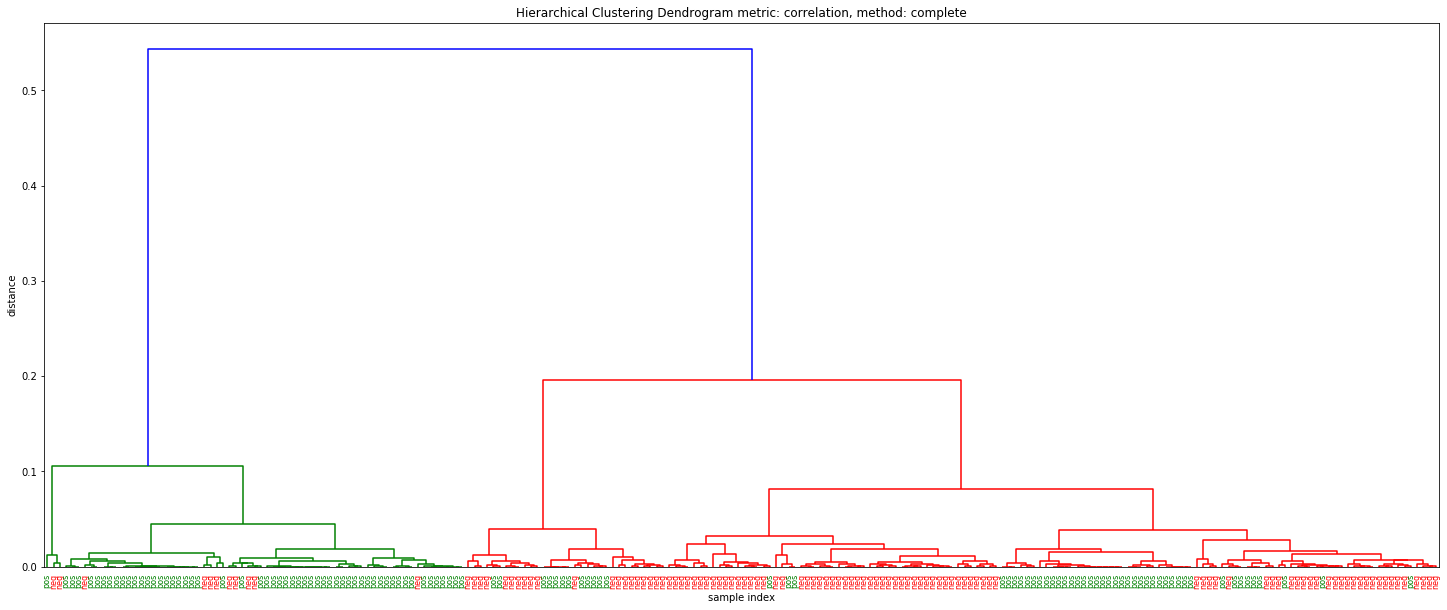

In [55]:
dataset = pd.read_csv(r'../tests/datasets/dataset1_test_clean_fselection.csv', delimiter=',')

#separate labels
x_original=dataset.loc[:, dataset.columns != 'labels']
labels=dataset.loc[:,'labels']

#scale data
scaler = StandardScaler()
scaler.fit_transform(x_original)


clust=Cluster(x_original,labels) #create the cluster object

# #perform K means
print('kmeans')
clust.kmeans()

#perform hierarchical clustering
clust.hierarchical(metric='correlation', method='complete')
# clust.hierarchical(metric='euclidean', method='complete')

# clust.hierarchical(metric='correlation', method='average')
# clust.hierarchical(metric='euclidean', method='ward')
# clust.hierarchical(metric='cityblock', method='average')

7. Machine Learning

In [73]:
from propythia.machine_learning import MachineLearning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import ShuffleSplit

In [63]:
#split dataset
dataset = pd.read_csv(r'../tests/datasets/dataset1_test_clean_fselection.csv', delimiter=',')

x_original=dataset.loc[:, dataset.columns != 'labels']
labels=dataset['labels']

ml=MachineLearning(x_original, labels, classes=['pos', 'neg']) #create Machine learning object


In [64]:
# TEST MODELS
print('best model svm')
best_svm_model = ml.train_best_model('svm')
print('best model rf')
best_rf_model = ml.train_best_model('rf')
# print('best model sgd')
# best_sgd_model = ml.train_best_model('sgd')
# print('best model gradient boosting')
# best_gboosting_model = ml.train_best_model('gboosting')
# print('best model lr')
# best_lr_model = ml.train_best_model('lr')
# print('best model nn')
# best_nn_model = ml.train_best_model('nn')

# print('best model gnb')
# best_gnb_model = ml.train_best_model('gnb')

# print('best model knn')
# best_knn_model = ml.train_best_model('knn')


best model svm
performing grid search...
Best score svm (scorer: make_scorer(matthews_corrcoef)) and parameters from a 10-fold cross validation:
MCC score:	0.928
Parameters:	{'clf__C': 0.001, 'clf__gamma': 1e-05, 'clf__kernel': 'linear'}
best model rf
performing grid search...
Best score rf (scorer: make_scorer(matthews_corrcoef)) and parameters from a 10-fold cross validation:
MCC score:	0.913
Parameters:	{'clf__bootstrap': True, 'clf__criterion': 'gini', 'clf__max_features': 'sqrt', 'clf__n_estimators': 100}


In [65]:
# SCORING TEST SET 
print('score_test_set_svm')
print(ml.score_testset(best_svm_model))
print('score_test_set_rf')
print(ml.score_testset(best_rf_model))

score_test_set_svm
             Scores
MCC            0.94
accuracy       0.97
precision      0.94
recall         1.00
f1             0.97
roc_auc        0.97
TN            34.00
FP             2.00
FN             0.00
TP            31.00
FDR            0.06
sensitivity    1.00
specificity    0.94
score_test_set_rf
             Scores
MCC            0.86
accuracy       0.93
precision      0.86
recall         1.00
f1             0.93
roc_auc        0.93
TN            31.00
FP             5.00
FN             0.00
TP            31.00
FDR            0.14
sensitivity    1.00
specificity    0.86


SVM
                            importance
_PolarizabilityC2             0.083678
_SolventAccessibilityT12      0.074682
PAAC12                        0.054174
GearyAuto_Hydrophobicity6     0.041731
QSOSW25                       0.041257
GearyAuto_Hydrophobicity16   -0.023537
EN                           -0.029103
MoranAuto_ResidueASA4        -0.044011
_PolarizabilityD1100         -0.052806
_HydrophobicityD1025         -0.055459
CG                           -0.062126
MoranAuto_Mutability1        -0.062873
F                            -0.081364
PAAC14                       -0.081664
_SolventAccessibilityC1      -0.109761
PAAC8                        -0.110022


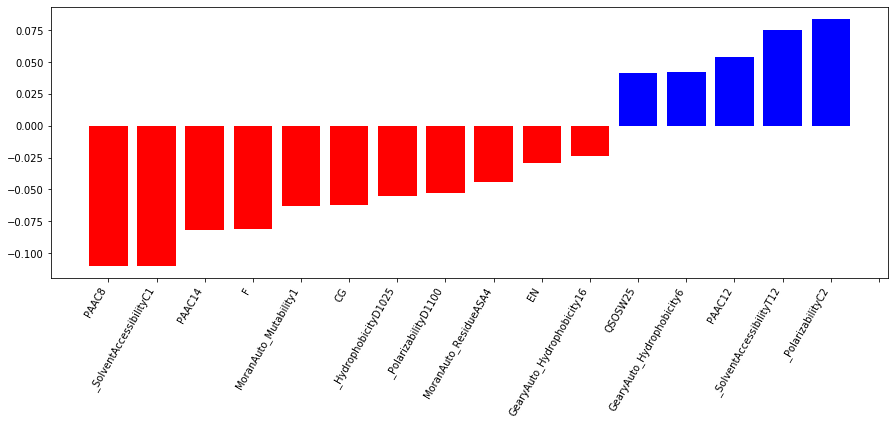

RF


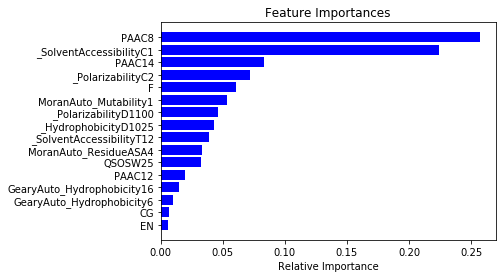

                            importance
PAAC8                         0.256929
_SolventAccessibilityC1       0.224413
PAAC14                        0.082967
_PolarizabilityC2             0.071729
F                             0.060662
MoranAuto_Mutability1         0.053115
_PolarizabilityD1100          0.046390
_HydrophobicityD1025          0.042628
_SolventAccessibilityT12      0.038621
MoranAuto_ResidueASA4         0.033501
QSOSW25                       0.032487
PAAC12                        0.019453
GearyAuto_Hydrophobicity16    0.014897
GearyAuto_Hydrophobicity6     0.009596
CG                            0.006613
EN                            0.005999


,importance
PAAC8,0.256929
_SolventAccessibilityC1,0.224413
PAAC14,0.082967
_PolarizabilityC2,0.071729
F,0.060662
MoranAuto_Mutability1,0.053115
_PolarizabilityD1100,0.046390
_HydrophobicityD1025,0.042628
_SolventAccessibilityT12,0.038621
MoranAuto_ResidueASA4,0.033501


In [97]:
# RETRIEVE FEATURES IMPORTANCES
print('SVM')
ml.features_importances(best_svm_model,'svm')
print('RF')
ml.features_importances(best_rf_model,'rf')

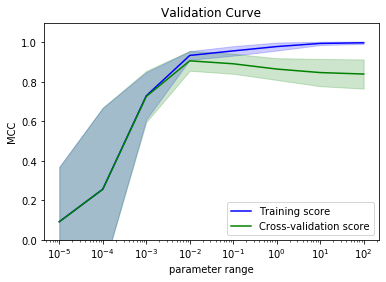

In [91]:
# PLOT VALIDATION CURVE 
ml.plot_validation_curve(best_svm_model, param_name='clf__C',
                         param_range=[0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10,100])

0.9722222222222222


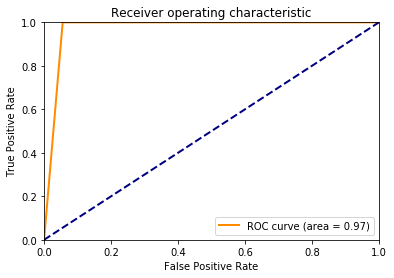

In [92]:
# PLOT ROC CURVE 
ml.plot_roc_curve(best_svm_model)

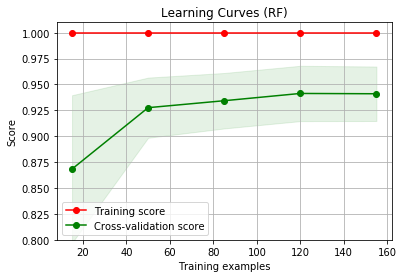

(array([ 15,  50,  85, 120, 155]),
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 

In [93]:
# PLOT LEARNING CURVE
ml.plot_learning_curve(best_rf_model, title = "Learning Curves (RF)", ylim=(0.8, 1.01), n_jobs=4)

In [81]:
# MAKE PREVISIONS
X_train, X_test, y_train, y_test = train_test_split(x_original,labels)
print('predict_svm')
df = ml.predict(best_svm_model, x=X_test, seqs=y_test)
print(df.head(10))

predict_svm
        P_class0  P_class1
labels                    
neg     0.035166  0.964834
neg     0.005020  0.994980
neg     0.005943  0.994057
pos     0.901804  0.098196
pos     0.892399  0.107601
pos     0.761473  0.238527
neg     0.000019  0.999981
neg     0.091068  0.908932
neg     0.013513  0.986487
pos     0.908258  0.091742


In [94]:
seq='IQIPSEFTIGNMEEFIQTSSPKVTIDCAAFVCGDYAACKSQLVEYGSFCDNINAILTEVNELLDTTQLQVANSLMNGVTLSTKLKDGVNFNVDDINFSSVLGCLGSECSKASSRSAIEDLLFDKVKLSDVGFVAAYNNCTGGAEIRDLICVQSYKGIKVLPPLLSENQISGYTLAATSASLFPPWTAAAGVPFYLNVQYRINGLGVTMDVLSQNQKLIANAFNNALDAIQEGFDATNSALVKIQAVVNANAEALNNLLQQLSNRFGAISSSLQEILSRLDALEAEAQIDRLINGRLTALNAYVSQQLSDSTLVKFSAAQAMEKVNECVKSQSSRINFCGNGNHIISLVQNAPYGLYFIHFSYVPTKYVTAKVSPGLCIAGDRGIAPKSGYFVNVNNTWMYTGSGYYYPEPITENNVVVMSTCAVNYTKAPYVMLNTSTPNLPDFREELDQWFKNQTSVAPDLSLDYINVTFLDLQVEMNRLQEAIKVLNQSYINLKDIGTYEYYVKWPWYVWLLIGLAGVAMLVLLFFICCCTGCGTSCFKKCGGCC'
df = ml.predict_window(best_svm_model,seq=seq,x=None, window_size=15,gap=2,features=[], names=None, y=None, filename=None)
print(df.head(10))

   pos_0  pos_-1  probability  scale_probability         sequence
0    0.0    15.0       0.3334                0.0  IQIPSEFTIGNMEEF
1   74.0    89.0       0.7226                1.0  MNGVTLSTKLKDGVN
2   76.0    91.0       0.5123                0.0  GVTLSTKLKDGVNFN
3   80.0    95.0       0.7321                1.0  STKLKDGVNFNVDDI
4   82.0    97.0       0.6592                0.0  KLKDGVNFNVDDINF
5  106.0   121.0       0.7812                1.0  ECSKASSRSAIEDLL
6  108.0   123.0       0.6407                0.0  SKASSRSAIEDLLFD
7  244.0   259.0       0.7873                1.0  AVVNANAEALNNLLQ
8  246.0   261.0       0.9315                3.0  VNANAEALNNLLQQL
9  248.0   263.0       0.4529                0.0  ANAEALNNLLQQLSN


#### END